In [190]:
import pandas as pd

df = pd.read_csv("stunting.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      571 non-null    int64  
 1   created_at               571 non-null    object 
 2   favorite_count           571 non-null    int64  
 3   full_text                571 non-null    object 
 4   id_str                   571 non-null    int64  
 5   image_url                196 non-null    object 
 6   in_reply_to_screen_name  260 non-null    object 
 7   lang                     571 non-null    object 
 8   location                 0 non-null      float64
 9   quote_count              571 non-null    int64  
 10  reply_count              571 non-null    int64  
 11  retweet_count            571 non-null    int64  
 12  tweet_url                571 non-null    object 
 13  user_id_str              571 non-null    int64  
 14  username                 0

In [191]:
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1942406518491726207,Tue Jul 08 11:39:47 +0000 2025,0,@halonpc Dewasa tp kitnya stunting,1942549168175845400,NaN,halonpc,in,NaN,0,0,0,https://x.com/undefined/status/194254916817584...,1581187513401905153,NaN
1,1942545062673707029,Tue Jul 08 11:23:28 +0000 2025,145,Bayangin 240 T buat biayain BPJS kesehatan kit...,1942545062673707029,NaN,NaN,in,NaN,3,3,122,https://x.com/undefined/status/194254506267370...,212953008,NaN
2,1942538544544936395,Tue Jul 08 10:57:34 +0000 2025,0,Wakil Bupati Luwu Tegaskan Pentingnya Kolabora...,1942538544544936395,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/194253854454493...,1737365576878833664,NaN
3,1942537377182015973,Tue Jul 08 10:52:55 +0000 2025,0,Pemprov Banten bareng BNI dan BKKBN gaspol tek...,1942537377182015973,https://pbs.twimg.com/media/GvVHczVXMAIcXQF.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/194253737718201...,2911375412,NaN
4,1942537277890257138,Tue Jul 08 10:52:32 +0000 2025,0,Dari Desa Aur Cino Babinsa Koramil Pulau Temia...,1942537277890257138,https://pbs.twimg.com/media/GvVHW91aYAUH0AS.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/194253727789025...,1601821350678519808,NaN


In [192]:
data_tweet = pd.DataFrame(data=df['full_text'])
data_tweet.head()

,full_text
0,@halonpc Dewasa tp kitnya stunting
1,Bayangin 240 T buat biayain BPJS kesehatan kit...
2,Wakil Bupati Luwu Tegaskan Pentingnya Kolabora...
3,Pemprov Banten bareng BNI dan BKKBN gaspol tek...
4,Dari Desa Aur Cino Babinsa Koramil Pulau Temia...


# Data Cleaning

In [193]:
import re

In [194]:
def case_folding(tweet) :
    if tweet is not None and isinstance(tweet, str):
        tweet = tweet.lower()
        return tweet
    else:
        return tweet

In [195]:
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', tweet)
    else:
        return tweet

In [196]:
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', tweet)
    else:
        return tweet

In [197]:
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U0001F004-\U0001F0CF"  # Additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

In [198]:
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

In [199]:
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet)
    return tweet

In [200]:
def remove_usernames(tweet):
    return re.sub(r'@\w+', '', tweet)

In [201]:
def cleaning_pipeline(tweet) :
    tweet = case_folding(tweet)
    tweet = remove_URL(tweet)
    tweet = remove_html(tweet)
    tweet = remove_emoji(tweet)
    tweet = remove_symbols(tweet)
    tweet = remove_numbers(tweet)
    tweet = remove_usernames(tweet)
    return tweet
    

In [202]:
data_tweet['cleaning'] = data_tweet['full_text'].apply(lambda x: cleaning_pipeline(x))

In [203]:
data_tweet

,full_text,cleaning
0,@halonpc Dewasa tp kitnya stunting,halonpc dewasa tp kitnya stunting
1,Bayangin 240 T buat biayain BPJS kesehatan kit...,bayangin t buat biayain bpjs kesehatan kita g...
2,Wakil Bupati Luwu Tegaskan Pentingnya Kolabora...,wakil bupati luwu tegaskan pentingnya kolabora...
3,Pemprov Banten bareng BNI dan BKKBN gaspol tek...,pemprov banten bareng bni dan bkkbn gaspol tek...
4,Dari Desa Aur Cino Babinsa Koramil Pulau Temia...,dari desa aur cino babinsa koramil pulau temia...
...,...,...
566,@Ardalyn_ @timothyronald22 @Kalimasada97 terim...,ardalyn timothyronald kalimasada terima kasih ...
567,Bersama Kader Posyandu RAPP Bangun Harapan Ana...,bersama kader posyandu rapp bangun harapan ana...
568,Kubu Raya Kejar Target Nasional Penurunan Stun...,kubu raya kejar target nasional penurunan stun...
569,@taynewvie Yaisan stunting,taynewvie yaisan stunting


# Text Normalize

In [204]:
# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

# Baca dataset kamu (pastikan df sudah tersedia)
data = pd.DataFrame(data_tweet[['full_text','cleaning']])
data.head()

,full_text,cleaning
0,@halonpc Dewasa tp kitnya stunting,halonpc dewasa tp kitnya stunting
1,Bayangin 240 T buat biayain BPJS kesehatan kit...,bayangin t buat biayain bpjs kesehatan kita g...
2,Wakil Bupati Luwu Tegaskan Pentingnya Kolabora...,wakil bupati luwu tegaskan pentingnya kolabora...
3,Pemprov Banten bareng BNI dan BKKBN gaspol tek...,pemprov banten bareng bni dan bkkbn gaspol tek...
4,Dari Desa Aur Cino Babinsa Koramil Pulau Temia...,dari desa aur cino babinsa koramil pulau temia...


In [205]:
# Unduh dan baca kamus dari GitHub
kamus_data = pd.read_excel('kamuskatabaku.xlsx')

# Buat dictionary dari kamus
kamus_tidak_baku_dict = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [206]:
# Terapkan fungsi normalisasi
data_tweet[['normalisasi', 'Kata_Baku', 'Kata_Tidak_Baku', 'Kata_Tidak_Baku_Hash']] = data_tweet['cleaning'].apply(
    lambda x: pd.Series(replace_taboo_words(x, kamus_tidak_baku_dict))
)

# Ambil kolom yang relevan
data_tweet = pd.DataFrame(data_tweet[['full_text','cleaning','normalisasi']])
data_tweet.head(5)

,full_text,cleaning,normalisasi
0,@halonpc Dewasa tp kitnya stunting,halonpc dewasa tp kitnya stunting,halonpc dewasa tapi kitnya stunting
1,Bayangin 240 T buat biayain BPJS kesehatan kit...,bayangin t buat biayain bpjs kesehatan kita g...,bayangkan t buat biayain bpjs kesehatan kita t...
2,Wakil Bupati Luwu Tegaskan Pentingnya Kolabora...,wakil bupati luwu tegaskan pentingnya kolabora...,wakil bupati luwu tegaskan pentingnya kolabora...
3,Pemprov Banten bareng BNI dan BKKBN gaspol tek...,pemprov banten bareng bni dan bkkbn gaspol tek...,pemprov banten bareng bni dan bkkbn gaspol tek...
4,Dari Desa Aur Cino Babinsa Koramil Pulau Temia...,dari desa aur cino babinsa koramil pulau temia...,dari desa aur cina babinsa koramil pulau temia...


# Tokenisasi Data

In [207]:
def tokenize(text):
    tokens = text.split()
    return tokens

In [208]:
data_tweet['tokenize'] = data_tweet['normalisasi'].apply(tokenize)

data_tweet.head(5)

,full_text,cleaning,normalisasi,tokenize
0,@halonpc Dewasa tp kitnya stunting,halonpc dewasa tp kitnya stunting,halonpc dewasa tapi kitnya stunting,"[halonpc, dewasa, tapi, kitnya, stunting]"
1,Bayangin 240 T buat biayain BPJS kesehatan kit...,bayangin t buat biayain bpjs kesehatan kita g...,bayangkan t buat biayain bpjs kesehatan kita t...,"[bayangkan, t, buat, biayain, bpjs, kesehatan,..."
2,Wakil Bupati Luwu Tegaskan Pentingnya Kolabora...,wakil bupati luwu tegaskan pentingnya kolabora...,wakil bupati luwu tegaskan pentingnya kolabora...,"[wakil, bupati, luwu, tegaskan, pentingnya, ko..."
3,Pemprov Banten bareng BNI dan BKKBN gaspol tek...,pemprov banten bareng bni dan bkkbn gaspol tek...,pemprov banten bareng bni dan bkkbn gaspol tek...,"[pemprov, banten, bareng, bni, dan, bkkbn, gas..."
4,Dari Desa Aur Cino Babinsa Koramil Pulau Temia...,dari desa aur cino babinsa koramil pulau temia...,dari desa aur cina babinsa koramil pulau temia...,"[dari, desa, aur, cina, babinsa, koramil, pula..."


# Remove Stopwords

In [209]:
import nltk
from nltk.corpus import stopwords


In [ ]:
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')
stop_words.append('mbak')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zaldi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [211]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

In [212]:
data_tweet['stopword removal'] = data_tweet['tokenize'].apply(lambda x: remove_stopwords(x))

data_tweet.head(5)

,full_text,cleaning,normalisasi,tokenize,stopword removal
0,@halonpc Dewasa tp kitnya stunting,halonpc dewasa tp kitnya stunting,halonpc dewasa tapi kitnya stunting,"[halonpc, dewasa, tapi, kitnya, stunting]","[halonpc, dewasa, kitnya, stunting]"
1,Bayangin 240 T buat biayain BPJS kesehatan kit...,bayangin t buat biayain bpjs kesehatan kita g...,bayangkan t buat biayain bpjs kesehatan kita t...,"[bayangkan, t, buat, biayain, bpjs, kesehatan,...","[bayangkan, t, biayain, bpjs, kesehatan, iuran..."
2,Wakil Bupati Luwu Tegaskan Pentingnya Kolabora...,wakil bupati luwu tegaskan pentingnya kolabora...,wakil bupati luwu tegaskan pentingnya kolabora...,"[wakil, bupati, luwu, tegaskan, pentingnya, ko...","[wakil, bupati, luwu, tegaskan, kolaborasi, ce..."
3,Pemprov Banten bareng BNI dan BKKBN gaspol tek...,pemprov banten bareng bni dan bkkbn gaspol tek...,pemprov banten bareng bni dan bkkbn gaspol tek...,"[pemprov, banten, bareng, bni, dan, bkkbn, gas...","[pemprov, banten, bareng, bni, bkkbn, gaspol, ..."
4,Dari Desa Aur Cino Babinsa Koramil Pulau Temia...,dari desa aur cino babinsa koramil pulau temia...,dari desa aur cina babinsa koramil pulau temia...,"[dari, desa, aur, cina, babinsa, koramil, pula...","[desa, aur, cina, babinsa, koramil, pulau, tem..."


# Stemming Data

In [213]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [214]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

In [215]:
data_tweet['steming_data'] = data_tweet['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
data_tweet.head(5)

,full_text,cleaning,normalisasi,tokenize,stopword removal,steming_data
0,@halonpc Dewasa tp kitnya stunting,halonpc dewasa tp kitnya stunting,halonpc dewasa tapi kitnya stunting,"[halonpc, dewasa, tapi, kitnya, stunting]","[halonpc, dewasa, kitnya, stunting]",halonpc dewasa kit stunting
1,Bayangin 240 T buat biayain BPJS kesehatan kit...,bayangin t buat biayain bpjs kesehatan kita g...,bayangkan t buat biayain bpjs kesehatan kita t...,"[bayangkan, t, buat, biayain, bpjs, kesehatan,...","[bayangkan, t, biayain, bpjs, kesehatan, iuran...",bayang t biayain bpjs sehat iur dokter pusing ...
2,Wakil Bupati Luwu Tegaskan Pentingnya Kolabora...,wakil bupati luwu tegaskan pentingnya kolabora...,wakil bupati luwu tegaskan pentingnya kolabora...,"[wakil, bupati, luwu, tegaskan, pentingnya, ko...","[wakil, bupati, luwu, tegaskan, kolaborasi, ce...",wakil bupati luwu tegas kolaborasi cegah stunting
3,Pemprov Banten bareng BNI dan BKKBN gaspol tek...,pemprov banten bareng bni dan bkkbn gaspol tek...,pemprov banten bareng bni dan bkkbn gaspol tek...,"[pemprov, banten, bareng, bni, dan, bkkbn, gas...","[pemprov, banten, bareng, bni, bkkbn, gaspol, ...",pemprov banten bareng bni bkkbn gaspol tekan s...
4,Dari Desa Aur Cino Babinsa Koramil Pulau Temia...,dari desa aur cino babinsa koramil pulau temia...,dari desa aur cina babinsa koramil pulau temia...,"[dari, desa, aur, cina, babinsa, koramil, pula...","[desa, aur, cina, babinsa, koramil, pulau, tem...",desa aur cina babinsa koramil pulau temiang ko...


In [216]:
data_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   full_text         571 non-null    object
 1   cleaning          571 non-null    object
 2   normalisasi       571 non-null    object
 3   tokenize          571 non-null    object
 4   stopword removal  571 non-null    object
 5   steming_data      571 non-null    object
dtypes: object(6)
memory usage: 26.9+ KB


In [229]:
df_clean = pd.DataFrame(data_tweet['steming_data'])
df_clean.to_csv('clean_stunting.csv')

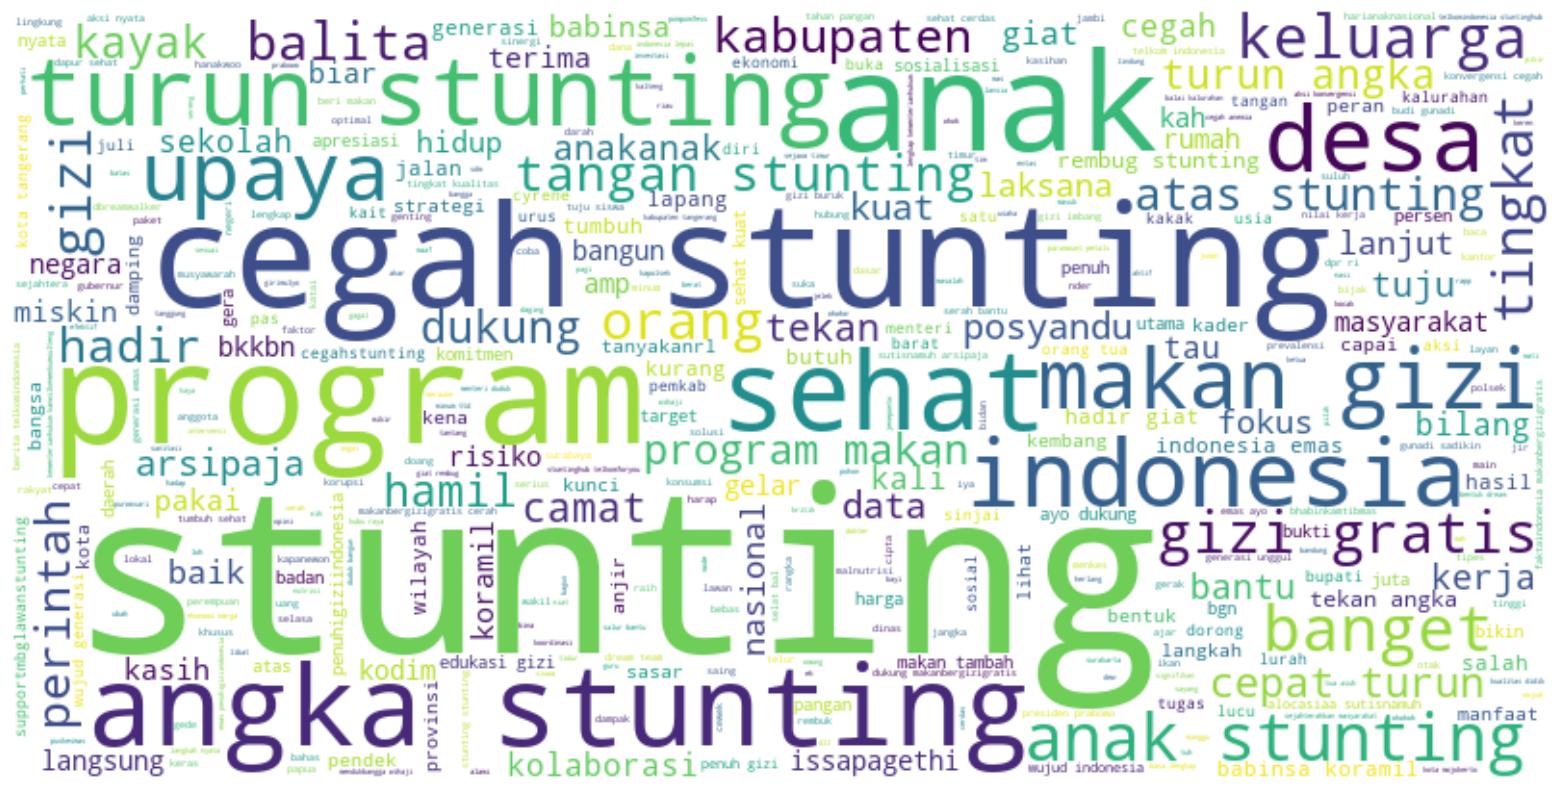

In [230]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

# Buat stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update(['mbak', 'gue', 'kak', 'sih', 'ya'])


text_after = ' '.join(df_clean['steming_data'].astype(str).tolist())
wc_after = WordCloud(stopwords=stopwords ,background_color="white", max_words=500, width=800, height=400).generate(text_after)

# Visualisasi side-by-side
plt.figure(figsize=(16, 8))
plt.imshow(wc_after, interpolation='bilinear')
plt.axis("off")

plt.tight_layout()
plt.show()


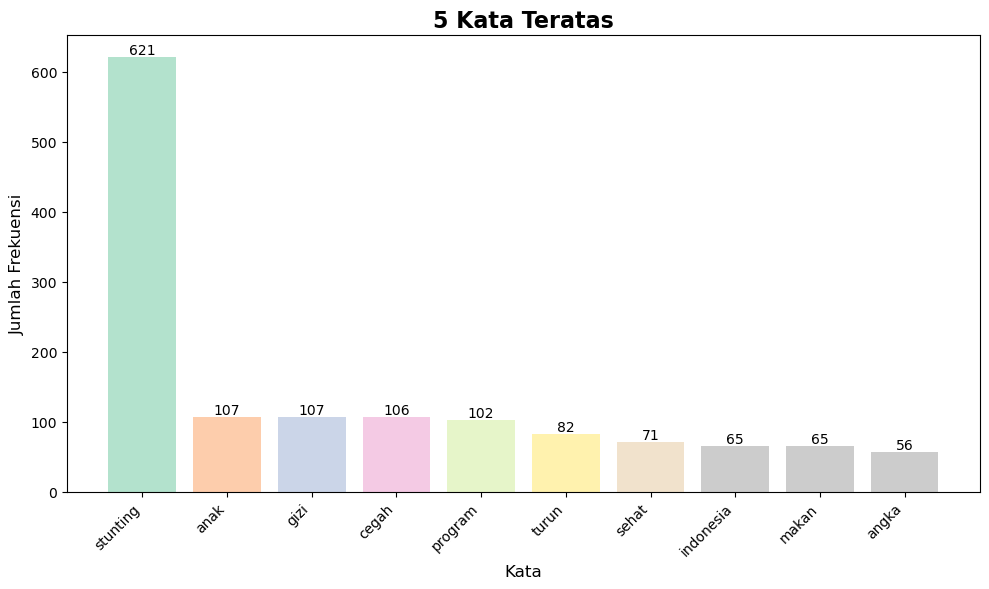

In [232]:
import matplotlib.pyplot as plt
from collections import Counter


# Proses data dari kolom 'steming_data'
all_text_after = ' '.join(df_clean["steming_data"].astype(str))
words_after = all_text_after.split()
filtered_words_after = [word for word in words_after if word.lower() not in stopwords]
word_counts_after = Counter(filtered_words_after)
top_words_after = word_counts_after.most_common(10)

# Jika tidak ada kata yang ditemukan, hentikan eksekusi untuk menghindari error
if not top_words_after:
    print("Tidak ada kata untuk ditampilkan setelah filtering.")
else:
    word_after, count_after = zip(*top_words_after)

    # Membuat satu plot tunggal
    plt.figure(figsize=(10, 6)) # Ukuran disesuaikan untuk satu plot

    # Plot untuk data 'AFTER'
    colors = plt.cm.Pastel2(range(len(word_after)))
    bars = plt.bar(word_after, count_after, color=colors)

    # Menambahkan judul dan label
    plt.title("5 Kata Teratas", fontsize=16, fontweight='bold')
    plt.xlabel("Kata", fontsize=12)
    plt.ylabel("Jumlah Frekuensi", fontsize=12)
    plt.xticks(rotation=45, ha="right") # Rotasi label sumbu x agar tidak tumpang tindih

    # Menambahkan label jumlah di atas setiap bar
    for bar, count in zip(bars, count_after):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.1, count, ha='center', va='bottom')

    # Merapikan layout dan menampilkan plot
    plt.tight_layout()
    plt.show()